In [8]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from scipy import stats

def setTime(t): #Convierte tiempo a decimales (max no es 60, sino 100)
    t=np.array(t)/1.0
    minut=np.array([round(int(i),2) for i in t])
    seg=t-minut
    segToMin=[round(i*100/60,1) for i in seg]
    return minut+segToMin

def gradplot(a,x,t,name='1',title='a'):
    a,x=np.array(a)/1.0,np.array(x)/1.0
    y1=np.log(a/(a-x))
    y2=x/(a*(a-x))
    y=[x,y1,y2]
    slp_inty_r2=[]
    fitxs=[]
    fitys=[]
    for numfig in range(3):
        slope,inter,rval,pval,stdv=stats.linregress(t,y[numfig])
        slp_inty_r2.append((slope,inter,rval**2))
        fitx=plt.array([i for i in plt.arange(t[0],t[-1],0.001)])
        fity=[slope*x+inter for x in fitx]
        fitxs.append(fitx)
        fitys.append(fity)
    r2=[slp_inty_r2[i][2] for i in range(len(slp_inty_r2))]
        
    #Plots
    fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,sharex=True,figsize=(6,10))
    
    ax1=plt.subplot(311)
    ax2=0
    ax3=0
    axs=[ax1,ax2,ax3]
    
    for axnum in range(len(axs)):
        ax=plt.subplot(3,1,axnum+1,sharex=ax1)
        ax.plot(fitxs[axnum],fitys[axnum],'k--')
        ax.plot(t,y[axnum],'r+',label='K = ' + str(round(slp_inty_r2[axnum][0],6)))
        plt.ylabel('Grado '+str(axnum))
        ax.plot(0,0,'w+',markersize=0,label=r'$R^2 = $'+str(round(slp_inty_r2[axnum][2],4)))
        plt.grid()
        plt.legend()
        if axnum==2:
            plt.xlabel('time(min)')
    
    plt.savefig(name,dpi=200)
    plt.show()

    print('Grado de la reacción =',r2.index(max(r2)))   
    return slp_inty_r2

In [9]:
t=[0,10.11,15.11,20.18,25.5,35.26,49.38,66.32,85.19,105.28]
t=setTime(t)
Vnaohdt=np.array([25,25.7,25.6,26.1,26.2,27.0,27.8,28.5,29.7,30.3])
Vnaoh=Vnaohdt-Vnaohdt[0]

Vfinal=37.2
densacet=0.897 #g/cm3
mmassacet=88.1051 #g/mol
Viacet=5 #mL
molarnaoh=0.2003
Vihcl=100 #mL

In [10]:
#Disminucion de la concentración de acetato con t
xiacetat=densacet*Viacet*1000/(mmassacet*(Viacet+Vihcl)) #Molaridad (mol/L)
xiacetat

xacid=molarnaoh*Vnaoh/Viacet
xacid

xacetato=xiacetat-xacid

In [11]:
data={'$V_{NaOH}$(mL)':Vnaoh,'[AcidAcet](mol/L)':np.around(xacid,3),'[Acetato](mol/L)':np.around(xacetato,3)}
df=pd.DataFrame(data)
df=df.set_index(t)
df.index.names=['time(min)']
df

,$V_{NaOH}$(mL),[Acetato](mol/L),[AcidAcet](mol/L)
time(min),,,
0.0,0.0,0.485,0.000
10.2,0.7,0.457,0.028
15.2,0.6,0.461,0.024
20.3,1.1,0.441,0.044
25.8,1.2,0.437,0.048
35.4,2.0,0.405,0.080
49.6,2.8,0.373,0.112
66.5,3.5,0.345,0.140
85.3,4.7,0.297,0.188


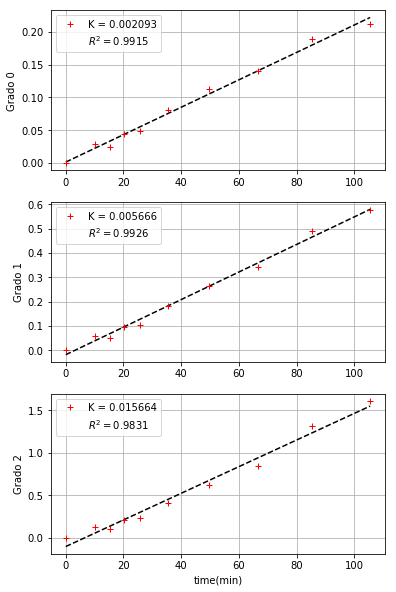

Grado de la reacción = 1


[(0.0020926280549750562, 0.00113845108513215, 0.99154048357323832),
 (0.0056655728552505343, -0.018135943538074878, 0.9925962626053858),
 (0.015663953589737479, -0.10289059914949528, 0.9831497454681537)]

In [12]:
#Midiendo variacion de concentracion de acetato
a=xiacetat
x=xiacetat-xacetato
gradplot(a,x,t,name='DeltaConcent_acetato.png',title='x=Concent_acetato')

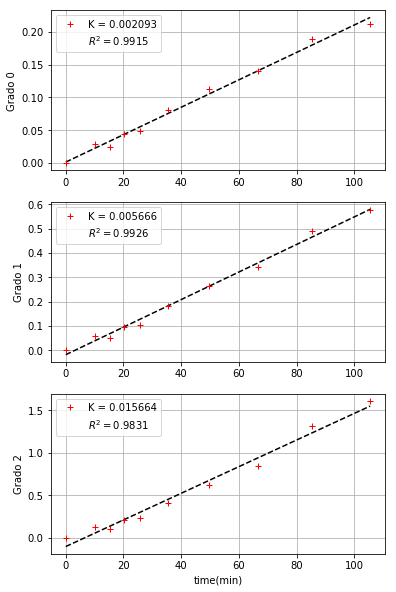

Grado de la reacción = 1


[(0.0020926280549750562, 0.0011384510851321777, 0.99154048357323832),
 (0.0056655728552505343, -0.018135943538074878, 0.9925962626053858),
 (0.015663953589737479, -0.10289059914949528, 0.9831497454681537)]

In [13]:
#Midiendo variacion de concentracion de acido acetico
a=xiacetat
x=xacid
gradplot(a,x,t,name='DeltaConcent_AcidAcet.png', title='x=AcidAcet')

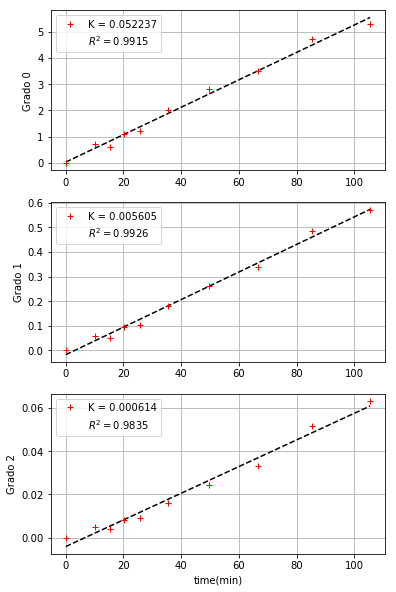

Grado de la reacción = 1


[(0.052237345356341891, 0.028418649154572595, 0.99154048357323832),
 (0.0056048207027785055, -0.017738862312723092, 0.99263815484329998),
 (0.00061383267064380961, -0.0039920685144631506, 0.98345530075289245)]

In [14]:
#Midiendo volumen de NaOH
a=Vfinal-Vnaohdt[0]
x=Vnaoh
gradplot(a,x,t,name='VolumenNaOH.png', title='x=V_NaOH')